In [1]:
import os

In [2]:
data_dir ='C:\\Users\\Lenovo\\Downloads\\cell_images'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from matplotlib.image import imread

In [7]:
test_path = data_dir + "\\test\\"
train_path =data_dir + "\\train\\"

In [8]:
test_path

'C:\\Users\\Lenovo\\Downloads\\cell_images\\test\\'

In [9]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [10]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [12]:
os.listdir(train_path + 'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [15]:
para_cell = train_path + 'parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png'
para_cell

'C:\\Users\\Lenovo\\Downloads\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

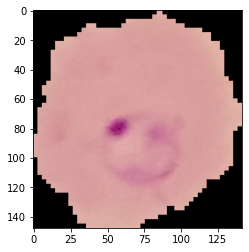

In [19]:
plt.imshow(imread(para_cell))

In [33]:
os.listdir(train_path + 'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

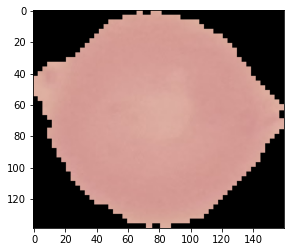

In [26]:
uninfected_cell = train_path + 'uninfected\\' + 'C100P61ThinF_IMG_20150918_144104_cell_128.png'
plt.imshow(imread(uninfected_cell))

In [36]:
imread(uninfected_cell).shape

(139, 160, 3)

In [27]:
pwd

'C:\\Users\\Lenovo\\Desktop\\TF_2_Notebooks_and_Data\\04-CNNs'

In [29]:
len(os.listdir(train_path + 'parasitized'))

12480

In [31]:
len(os.listdir(test_path + 'parasitized'))

1300

In [37]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path +'uninfected'):
    img = imread(test_path + 'uninfected\\' + image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
    

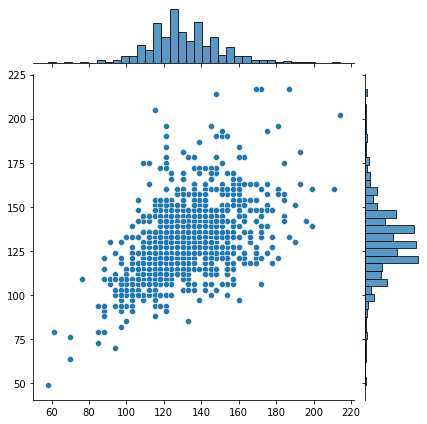

In [41]:
sns.jointplot(x=dim1,y=dim2)

In [43]:
np.mean(dim1)

130.92538461538462

In [44]:
np.mean(dim2)

130.75

In [45]:
image_shape = (130,130,3)

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [48]:
image_gen = ImageDataGenerator(rotation_range = 20,
                              width_shift_range = 0.1,
                              height_shift_range = 0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip = True,
                              fill_mode='nearest')

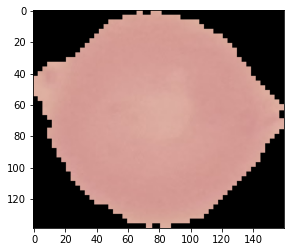

In [50]:
plt.imshow(imread(uninfected_cell))

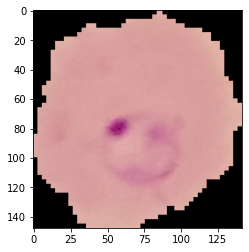

In [52]:
para_img = imread(para_cell)
plt.imshow(para_img)

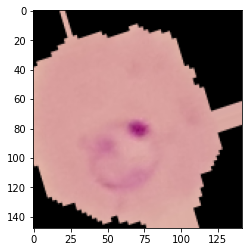

In [53]:
plt.imshow(image_gen.random_transform(para_img))

In [54]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [59]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape= image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)      

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
early_stop = EarlyStopping(monitor='val_loss',patience = 2)

In [64]:
batch_size = 16

In [66]:
train_image_gen= image_gen.flow_from_directory(train_path,
                                               target_size = image_shape[:2],
                                               color_mode= 'rgb',
                                               batch_size = batch_size,
                                               class_mode = 'binary'
                                              )

Found 24958 images belonging to 2 classes.


In [68]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'binary',
                                              shuffle= False)

Found 2600 images belonging to 2 classes.


In [69]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [70]:
#results = model.fit_generator(train_image_gen,epochs=20,validation_data=test_image_gen,callbacks=[early_stop])

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_10028/4252985099.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=20,validation_data=test_image_gen,callbacks=[early_stop])


Epoch 1/20
 509/1560 [========>.....................] - ETA: 4:30 - loss: 1.4137 - accuracy: 0.5445

KeyboardInterrupt: 

In [71]:
from tensorflow.keras.models import load_model

In [72]:
model = load_model('malaria_detector.h5')

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [75]:
model.evaluate(test_image_gen)

163/163 [==============================] - 13s 77ms/step - loss: 35.1189 - accuracy: 0.8715


[35.11894607543945, 0.8715384602546692]

In [76]:
model.metrics_names

['loss', 'accuracy']

In [88]:
pred = model.predict(test_image_gen)

In [89]:
predictions = pred > 0.5

In [90]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [91]:
from sklearn.metrics import classification_report,confusion_matrix

In [93]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1300
           1       0.97      0.76      0.85      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.87      2600
weighted avg       0.89      0.87      0.87      2600



<AxesSubplot:>

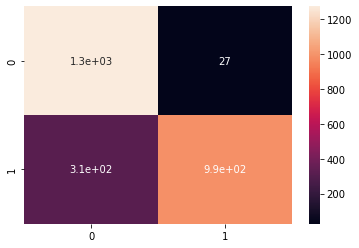

In [96]:
sns.heatmap(confusion_matrix(test_image_gen.classes,predictions),annot=True)

In [97]:
para_cell

'C:\\Users\\Lenovo\\Downloads\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [98]:
from tensorflow.keras.preprocessing import image

In [102]:
my_image = image.load_img(para_cell,target_size = image_shape)

In [103]:
my_image_arr= image.img_to_array(my_image)

In [105]:
my_image_arr.shape

(130, 130, 3)

In [110]:
my_image_arr = np.expand_dims(my_image_arr,axis=0)

In [111]:
model.predict(my_image_arr)

array([[0.]], dtype=float32)

In [112]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}